In [1]:
import tensorflow as tf
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
import numpy as np
import pickle
from sklearn.externals import joblib
import matplotlib.pyplot as plt
%matplotlib inline

/home/ruby/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#Load MNIST data from tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)
# mnist_one_hot = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
train_images = mnist.train.images
train_labels = mnist.train.labels
test_images = mnist.test.images
test_labels = mnist.test.labels

In [4]:
def trainRandomForest(index):
    model = RandomForestClassifier(n_estimators=index,n_jobs=4)
#     print index
#     model.random_state(index)
    model.fit(train_images, train_labels)
    return model

models = {}
for i in range(1,100):
    print i
    model = trainRandomForest(i)
    models[i] = model

joblib.dump(models, 'random_forest_models.pkl')
# print models

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


['random_forest_models.pkl']

In [ ]:
clf.estimators_[i].predict_proba(np.reshape(test_samples[idx],(1,-1)))[0]

In [51]:
print test_labels[7]
print models[3].estimators_[0].predict_proba(np.reshape(test_images[7],(1,-1)))[0]
print models[3].estimators_[1].predict_proba(np.reshape(test_images[7],(1,-1)))[0]
print models[3].estimators_[2].predict_proba(np.reshape(test_images[7],(1,-1)))[0]
print models[3].predict_log_proba(np.reshape(test_images[7],(1,-1)))

9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[[       -inf        -inf        -inf        -inf -1.09861229 -1.09861229
         -inf        -inf        -inf -1.09861229]]


/home/ruby/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/forest.py:623: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)


In [53]:
print test_labels[8]
print models[3].estimators_[0].predict_proba(np.reshape(test_images[8],(1,-1)))[0]
print models[3].estimators_[1].predict_proba(np.reshape(test_images[8],(1,-1)))[0]
print models[3].estimators_[2].predict_proba(np.reshape(test_images[8],(1,-1)))[0]
print models[3].predict_log_proba(np.reshape(test_images[8],(1,-1)))
print models[3].predict(np.reshape(test_images[8],(1,-1)))

5
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[[       -inf        -inf        -inf        -inf -1.09861229        -inf
  -1.09861229        -inf -1.09861229        -inf]]
[4]


In [57]:
print test_labels[8]
print models[93].estimators_[0].predict_proba(np.reshape(test_images[8],(1,-1)))[0]
print models[93].estimators_[1].predict_proba(np.reshape(test_images[8],(1,-1)))[0]
print models[93].estimators_[2].predict_proba(np.reshape(test_images[8],(1,-1)))[0]
print models[93].predict_log_proba(np.reshape(test_images[8],(1,-1)))
print models[93].oob_decision_function_(test_images,test_labels)
print models[93].predict(np.reshape(test_images[8],(1,-1)))

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[[-4.53259949 -4.53259949 -2.92316158 -4.53259949 -2.2300144  -1.16530366
  -1.64222774 -3.4339872  -1.69938615 -2.45315795]]


AttributeError: 'RandomForestClassifier' object has no attribute 'oob_decision_function_'

In [136]:
def plot_uncertainty(model,test_images,test_labels):
    predicted_output = model.predict_proba(test_images)
    
    zero = np.where(test_labels == 0)[0]
    one = np.where(test_labels == 1)[0]
    two = np.where(test_labels == 2)[0]
    three = np.where(test_labels == 3)[0]
    four = np.where(test_labels == 4)[0]
    five = np.where(test_labels == 5)[0]
    six = np.where(test_labels == 6)[0]
    seven = np.where(test_labels == 7)[0]
    eight = np.where(test_labels == 8)[0]
    nine = np.where(test_labels == 9)[0]
    fig, ax = plt.subplots(1,figsize=(8,6))
    ax.hist(predicted_output[zero, 1], histtype='step', label='zero')
    ax.hist(predicted_output[one, 1], histtype='step', label='one')
    ax.hist(predicted_output[two, 1], histtype='step', label='two')
    ax.hist(predicted_output[three, 1], histtype='step', label='three')
    ax.hist(predicted_output[four, 1], histtype='step', label='four')
    ax.hist(predicted_output[five, 1], histtype='step', label='five')
    ax.hist(predicted_output[six, 1], histtype='step', label='six')
    ax.hist(predicted_output[seven, 1], histtype='step', label='seven')
    ax.hist(predicted_output[eight, 1], histtype='step', label='eight')
    ax.hist(predicted_output[nine, 1], histtype='step', label='nine')

    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
              ncol=5, fancybox=True, shadow=True)
    
    ax.set_xlabel('Prediction (Classes probability)')
    ax.set_ylabel('Number of observations')

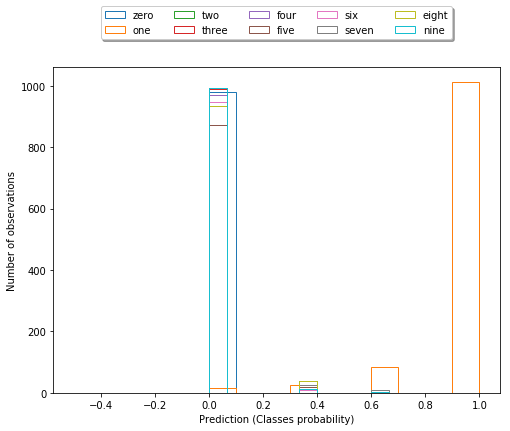

In [137]:
plot_uncertainty(models[3],test_images,test_labels)

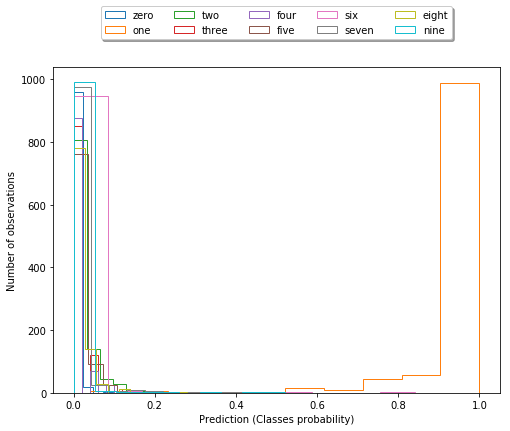

In [138]:
plot_uncertainty(models[25],test_images,test_labels)

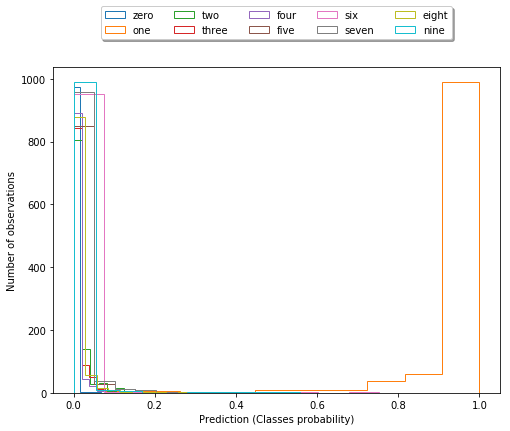

In [139]:
plot_uncertainty(models[77],test_images,test_labels)

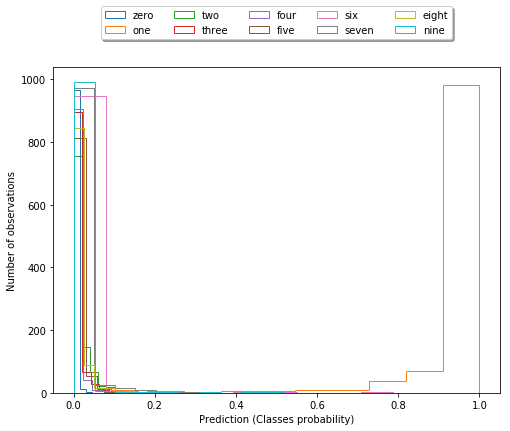

In [140]:
plot_uncertainty(models[99],test_images,test_labels)

In [ ]:
plot_uncertainty(models[3],test_images,test_labels)

In [79]:
models[3].predict(np.reshape(test_images[0],(1,-1)))[0]

Text(0,0.5,u'Number of observations')

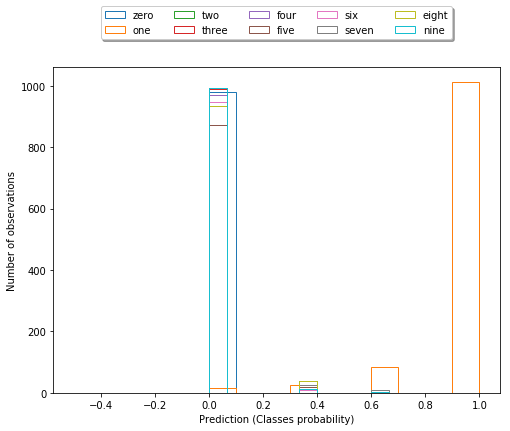

In [131]:
# print test_labels
# print models[3].predict(test_images)
predicted_output = models[3].predict_proba(test_images)

zero = np.where(test_labels == 0)[0]
one = np.where(test_labels == 1)[0]
two = np.where(test_labels == 2)[0]
three = np.where(test_labels == 3)[0]
four = np.where(test_labels == 4)[0]
five = np.where(test_labels == 5)[0]
six = np.where(test_labels == 6)[0]
seven = np.where(test_labels == 7)[0]
eight = np.where(test_labels == 8)[0]
nine = np.where(test_labels == 9)[0]
fig, ax = plt.subplots(1,figsize=(8,6))
ax.hist(predicted_output[zero, 1], histtype='step', label='zero')
ax.hist(predicted_output[one, 1], histtype='step', label='one')
ax.hist(predicted_output[two, 1], histtype='step', label='two')
ax.hist(predicted_output[three, 1], histtype='step', label='three')
ax.hist(predicted_output[four, 1], histtype='step', label='four')
ax.hist(predicted_output[five, 1], histtype='step', label='five')
ax.hist(predicted_output[six, 1], histtype='step', label='six')
ax.hist(predicted_output[seven, 1], histtype='step', label='seven')
ax.hist(predicted_output[eight, 1], histtype='step', label='eight')
ax.hist(predicted_output[nine, 1], histtype='step', label='nine')

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
          ncol=5, fancybox=True, shadow=True)

# handles, labels = ax.get_legend_handles_labels()
# plt.legend(flip(handles, 2), flip(labels, 2), loc=9, ncol=2)
# plt.legend(flip(handles, 2), flip(labels, 2), loc=9, ncol=2)
# print predicted_output

# misclassified = np.where(models[3].predict(test_images) == 0)
# classified = np.where(test_labels == models[3].predict(test_images))
# print "prediction output misclassified"
# print predicted_output[misclassified]
# print "prediction output classified"
# print  predicted_output[classified]
# # fig, ax = plt.subplots(1)
# ax.hist(predicted_output[misclassified], histtype='step', label='spam')
# ax.hist(predicted_output[classified], histtype='step', label='not spam')
ax.set_xlabel('Prediction (Classes probability)')
ax.set_ylabel('Number of observations')
# plt.legend()
# plt.show()
# print np.shape(misclassified)
# print misclassified[0][:10]

In [22]:
print models[25].score(test_images,test_labels)

0.9631


In [23]:
print models[77].score(test_images,test_labels)

0.9686


In [24]:
print models[99].score(test_images,test_labels)

0.9675


In [ ]:
spam_y_hat = spam_RFC.predict_proba(spam_X_test)

idx_spam = np.where(spam_y_test == 1)[0]
idx_ham = np.where(spam_y_test == 0)[0]

# Histogram predictions without error bars:


In [9]:
for i in range(len(test_labels)):
    
    

10000

In [ ]:
test_labels[0] -> 7
test_labels[1] -> 1
test_labels[5] -> 0

In [63]:

# models[0].predict(test_images)
print models[0].score(test_images, test_labels)
print models[0].estimators_[0].score(test_images, test_labels)
# models[0].predict(test_images)
# print models[1].score(test_images, test_labels)
print models[0].estimators_[1].score(test_images, test_labels)

0.822
0.8185
0.8216


In [64]:
(0.8185 + 0.8216)/2


0.82005

In [44]:
clf.predict(test_images)

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [45]:
clf.score(test_images, test_labels)

0.9471

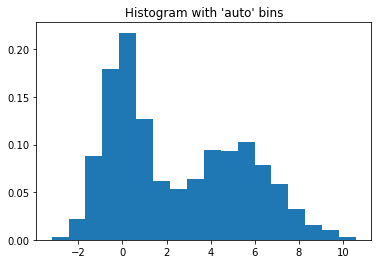

In [62]:
import matplotlib.pyplot as plt
rng = np.random.RandomState(10)  # deterministic random data
a = np.hstack((rng.normal(size=1000),
                rng.normal(loc=5, scale=2, size=1000)))
plt.hist(a, bins='auto',normed=True)  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

[0.1        0.         0.         0.26666667 0.63333333]


(array([2., 1., 0., 0., 1., 0., 0., 0., 0., 1.]),
 array([0.        , 0.06333333, 0.12666667, 0.19      , 0.25333333,
        0.31666667, 0.38      , 0.44333333, 0.50666667, 0.57      ,
        0.63333333]),
 <a list of 10 Patch objects>)

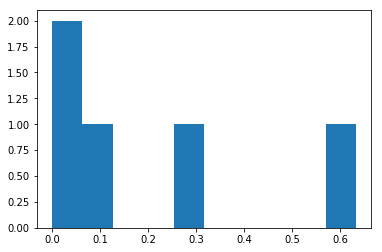

In [78]:
a = np.array([
    [0.1,0.0,0.0,0.0,0.9],
    [0.1,0.0,0.0,0.0,0.9],
    [0.1,0.0,0.0,0.8,0.1]
])
print np.average(a,axis=0)
plt.hist(np.average(a,axis=0))

In [68]:
np.histogram([1, 2, 1], bins=[0, 1, 2, 3])

(array([0, 2, 1]), array([0, 1, 2, 3]))